In [819]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


In [820]:
Titanic = pd.read_csv('/Users/ezzan/Downloads/python_drills/titanic.csv')
Titanic.dtypes
Titanic["alone"]=Titanic["alone"].fillna(0).astype(bool)
#Titanic["adult_male"]=Titanic["adult_male"].fillna(0).astype(bool)

In [821]:
Titanic["sex"] = Titanic["sex"].map({"male": 1, "female":0}).fillna(0).astype(np.int64)
Titanic['age'] = Titanic['age'].fillna(Titanic['age'].median()).astype(np.int64)
Titanic["adult_male"] = Titanic["adult_male"].map({"True": 1, "False":0}).fillna(0).astype(np.int64)
Titanic = Titanic.drop(["embark_town", "deck", "alive"], axis=1)
#Titanic.birth_year.astype(int)
Titanic['embarked'] = Titanic['embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(np.int64)
#Titanic['alive'] = Titanic['alive'].map( {'no': 0, 'yes': 1} ).fillna(0).astype(np.int64)
Titanic['alone'] = Titanic["alone"].map({"True": 1, "False":0}).fillna(0).astype(np.int64)
Titanic['class'] = Titanic["class"].map({"First": 1, "Second":2, "Third":3}).fillna(0).astype(np.int64)
Titanic['who'] = Titanic["who"].map({"man": 1, "woman":2, "child":3}).fillna(0).astype(np.int64)
Titanic["fare"] = Titanic["fare"].astype(np.int64)
Titanic.dtypes

survived      int64
pclass        int64
sex           int64
age           int64
sibsp         int64
parch         int64
fare          int64
embarked      int64
class         int64
who           int64
adult_male    int64
alone         int64
dtype: object

In [822]:
passenger_classes = sorted(Titanic['pclass'].unique())

# Survival Rate by Gender and Age

(-1.1067439296103823,
 1.1200496352155576,
 -1.1192695654148008,
 1.1009175983530857)

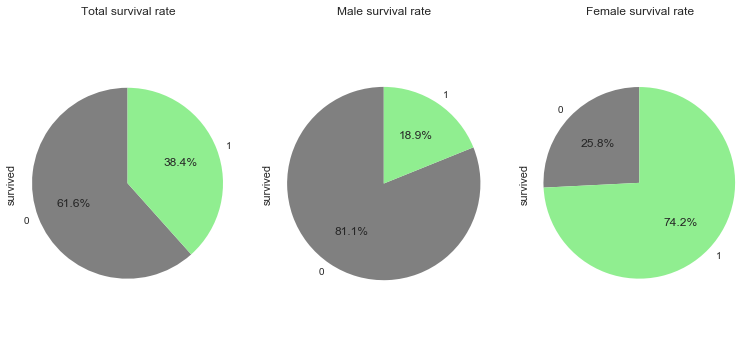

In [865]:
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['grey', 'lightgreen']
}


# Plots a bar graph of those who surived vs those who did not
plt.subplot2grid((1,3), (0,0))
Titanic.survived.value_counts() \
.plot(title='Total survival rate', **plot_params).axis('equal')


# Survival rate wrt Sex
df_male = Titanic.survived[Titanic.sex == 1].value_counts(normalize=True, sort=False)
df_female = Titanic.survived[Titanic.sex == 0].value_counts(normalize=True, sort=False)
df_1 = Titanic.survived[Titanic.embarked == 0].value_counts(normalize=True, sort=False)
df_2 = Titanic.survived[Titanic.embarked == 1].value_counts(normalize=True, sort=False)
df_3 = Titanic.survived[Titanic.embarked == 2].value_counts(normalize=True, sort=False)
df_p1 = Titanic.survived[Titanic.pclass == 1].value_counts(normalize=True, sort=False)
df_p2 = Titanic.survived[Titanic.pclass == 2].value_counts(normalize=True, sort=False)
df_p3 = Titanic.survived[Titanic.pclass == 3].value_counts(normalize=True, sort=False)
dfch = Titanic.survived[Titanic.who == 3].value_counts(normalize=True, sort=False)
## male survival plot
plt.subplot2grid((1,3),(0,1))
df_male.plot(title='Male survival rate', **plot_params).axis('equal')

## female survival plot

plt.subplot2grid((1,3),(0,2))
df_female.plot(title='Female survival rate', **plot_params).axis('equal')




# Survival Statistics based on Class

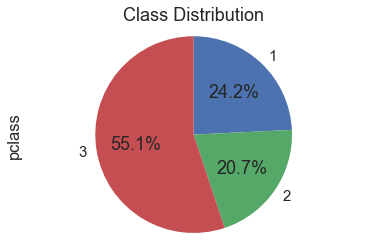

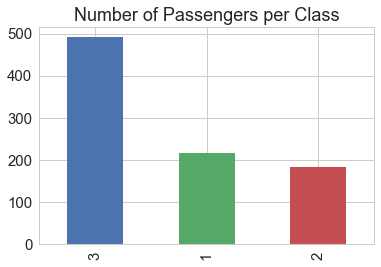

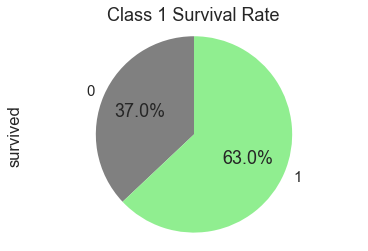

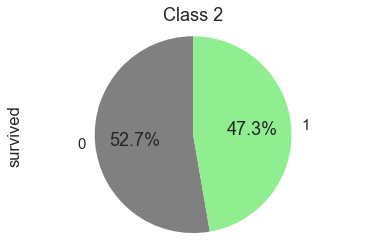

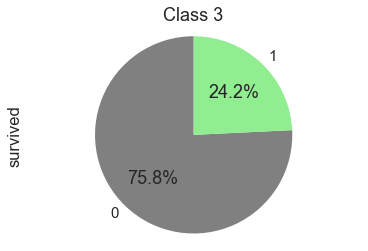

<Figure size 432x288 with 0 Axes>

In [824]:

Titanic.pclass.value_counts(sort=False).plot(kind='pie', title='Class Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
plt.show()


Titanic['pclass'].value_counts().plot(kind='bar', title='Number of Passengers per Class',grid=True)
plt.show()

df_p1.plot(title='Class 1 Survival Rate', **plot_params).axis('equal')
plt.show()

df_p2.plot(title='Class 2', **plot_params).axis('equal')
plt.show()

df_p3.plot(title='Class 3', **plot_params).axis('equal')
plt.show()
plt.tight_layout()
plt.show()


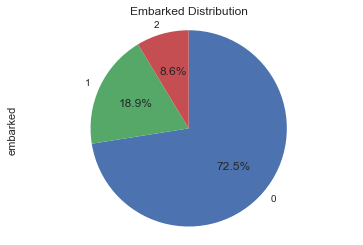

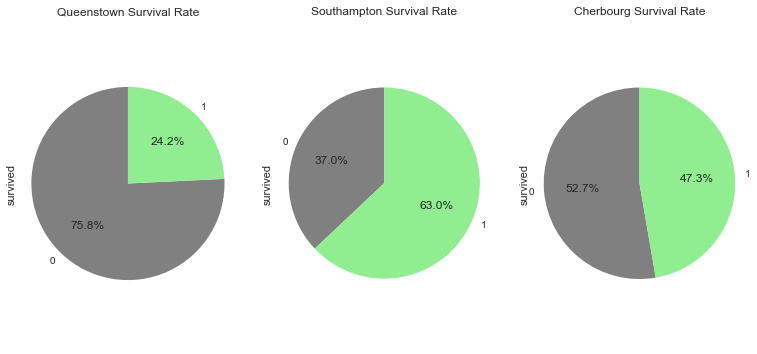

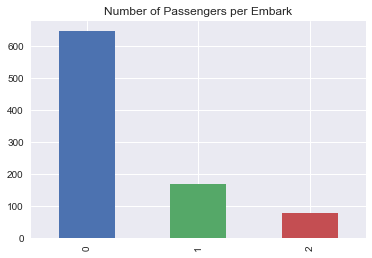

In [880]:
Titanic.embarked.value_counts(sort=False).plot(kind='pie', title='Embarked Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
plt.show()

plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['grey', 'lightgreen']
}

plt.subplot2grid((1,3),(0,0))
df_p3.plot(title='Queenstown Survival Rate', **plot_params).axis('equal')

plt.subplot2grid((1,3),(0,1))
df_p1.plot(title='Southampton Survival Rate', **plot_params).axis('equal')

plt.subplot2grid((1,3),(0,2))
df_p2.plot(title='Cherbourg Survival Rate', **plot_params).axis('equal')
plt.show()

Titanic['embarked'].value_counts().plot(kind='bar', title='Number of Passengers per Embark',grid=True)
plt.show()


ValueError: Could not interpret input 'alive'

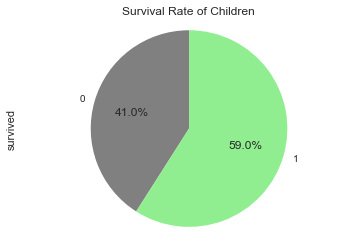

In [879]:

dfch.plot(title='Survival Rate of Children', **plot_params).axis('equal')
sns.set(style="darkgrid")

g = sns.factorplot(x="alive", y="fare", hue="who", data=Titanic,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("number")
g.set_xlabels("survived")
plt.title('Barplot: Fare by Alive/Perished and Gender')
plt.show()

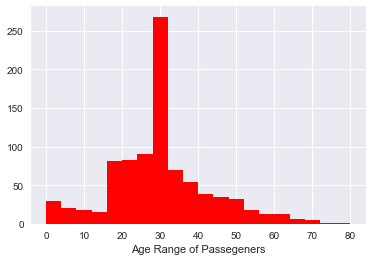

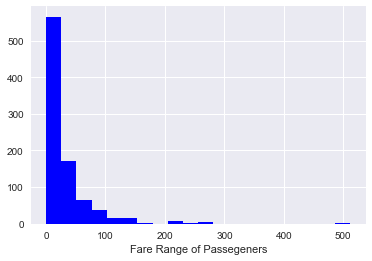

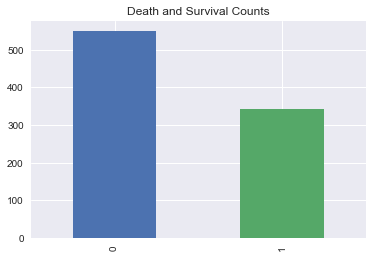

In [882]:
import matplotlib.pyplot as plt
plt.hist(Titanic['age'].dropna(),bins=20, color = 'red')
plt.xlabel('Age Range of Passegeners')
plt.show() 

plt.hist(Titanic['fare'].dropna(),bins=20, color = 'blue')
plt.xlabel('Fare Range of Passegeners')
plt.show()

Titanic['survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()


In [827]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


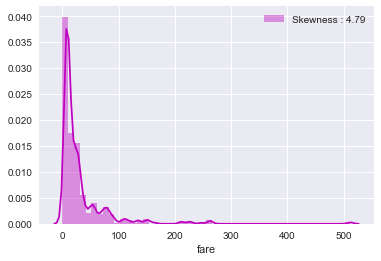

In [883]:

fare_dist = sns.distplot(Titanic["fare"], color="m", label="Skewness : %.2f"%(Titanic["fare"].skew()))
fare_dist = fare_dist.legend(loc="best")
plt.show()

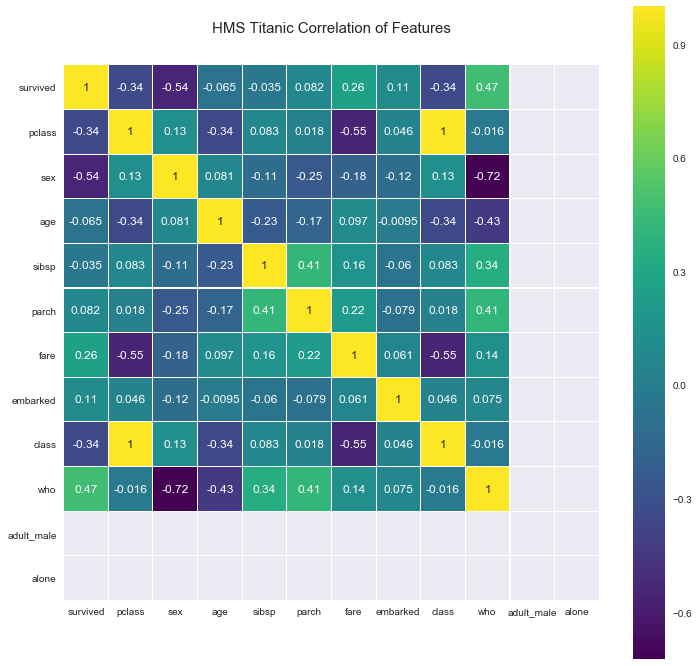

In [884]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('HMS Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(Titanic.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# KNN Tests

In [885]:

Titanicstats['age'] = Titanic['age'].fillna(0).astype(np.int64)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNNw = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
X = Titanic.drop("survived", axis=1)
Y = Titanic.survived
KNN.fit(X,Y)
KNNw.fit(X,Y)
score = cross_val_score(KNN, X, Y, cv=5)
score1 = cross_val_score(KNNw, X, Y, cv=5)

In [886]:
score

array([0.67597765, 0.69273743, 0.73033708, 0.7247191 , 0.70621469])

In [887]:
score1

array([0.67597765, 0.72625698, 0.74157303, 0.75280899, 0.75706215])

In [888]:
scorePCA = cross_val_score(KNN, newX, Y, cv=5)
scorePCA

array([0.81564246, 0.78212291, 0.84831461, 0.80337079, 0.84180791])

In [889]:
score1PCA = cross_val_score(KNNw, newX, Y, cv=5)
score1PCA

array([0.79329609, 0.77653631, 0.80337079, 0.79213483, 0.79661017])

In [890]:
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN5w = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
KNN5.fit(X,Y)
KNN5w.fit(X,Y)
score5 = cross_val_score(KNN, X, Y, cv=5)
score5w = cross_val_score(KNNw, X, Y, cv=5)
score5PCA = cross_val_score(KNN, newX, Y, cv=5)
score5wPCA = cross_val_score(KNNw, newX, Y, cv=5)
score5

array([0.67597765, 0.69273743, 0.73033708, 0.7247191 , 0.70621469])

In [891]:
score5w

array([0.67597765, 0.72625698, 0.74157303, 0.75280899, 0.75706215])

In [892]:
confusion_matrix(Y_test, Y_pred)

array([[118,  16],
       [ 17,  72]], dtype=int64)

In [893]:
cross_val_score(KNN, X_train, Y_train, cv=5)

array([0.81343284, 0.74626866, 0.81343284, 0.71428571, 0.79699248])

## KNN PCA

In [894]:
score5PCA

array([0.81564246, 0.78212291, 0.84831461, 0.80337079, 0.84180791])

In [895]:
score5wPCA

array([0.79329609, 0.77653631, 0.80337079, 0.79213483, 0.79661017])


## SVM Testing

In [896]:
SVM = SVC(kernel = 'linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
accuracy_score(Y_test, Y_pred)


0.852017937219731

In [897]:
SVM.score(X_train, Y_train)

0.8053892215568862

In [898]:
SVM.score(X_test, Y_test)

0.852017937219731

In [899]:
cross_val_score(SVM, X, Y, cv=5)

array([0.82122905, 0.82122905, 0.80898876, 0.76404494, 0.81920904])

### SVM Testing (PCA) 

In [900]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=4)
ss = StandardScaler()
scalerx = ss.fit_transform(X)
# Create a new training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(scalerx, Y, test_size=0.3)

# Fit and transform training and testing dataset with PCA
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.fit_transform(X_test2)

In [901]:
SVM.score(X_train2, y_train2)

0.8138041733547352

In [902]:
SVM.score(X_test2, y_test2)

0.8246268656716418

## Logistic Regression

In [903]:


logisticregression = LogisticRegression(C=1e9)
fit = logisticregression.fit(X, Y)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average Regression Accuracy score:')
print(sum(score)/4)

Coefficients
[[-0.38358859 -0.74689974 -0.25306408 -0.44307835 -0.24124661  0.31431863
   0.14751658 -0.38358859  0.77277173  0.          0.        ]]
[-0.66213533]


ValueError: X has 11 features per sample; expecting 12

In [ ]:

fit = logisticregression.fit(X_train2, y_train2)
predict_train = fit.predict(X_train2)

# Cross-validate.
scorepca = cross_val_score(logisticregression, X_train2, y_train2, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train2,y_train2))
print('\n Accuracy scores:')
print(scorepca)
print('\n Average Regression Accuracy score:')
print(sum(scorepca)/4)

## Decision Tree

In [ ]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [ ]:

cvscore = cross_val_score(clf1, X, Y, cv=5)
cvscore1 = cross_val_score(clf1, newX, Y, cv=5)

In [ ]:
print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

In [ ]:
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
cvscore2 = cross_val_score(clf2, X, Y, cv=5)
cvscore2pca = cross_val_score(clf2, newX, Y, cv=5)
print(cvscore2)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2.mean(), cvscore2.std()))

In [ ]:
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=5)
cvscore3 = cross_val_score(clf3, X, Y, cv=5)
cvscore3pca = cross_val_score(clf3, newX, Y, cv=5)
print(cvscore3)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3.mean(), cvscore3.std()))

In [ ]:
clf5 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
cvscore5pca = cross_val_score(clf5, newX, Y, cv=5)
cvscore5 = cross_val_score(clf5, X, Y, cv=5)
print(cvscore5)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5.mean(), cvscore5.std()))

In [ ]:
clf6 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)
cvscore6pca = cross_val_score(clf6, newX, Y, cv=5)
cvscore6 = cross_val_score(clf6, X, Y, cv=5)
print(cvscore6)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6.mean(), cvscore6.std()))

## Decision Tree (PCA)

In [ ]:
print(cvscore1)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore1.mean(), cvscore1.std()))

In [ ]:

print(cvscore2pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2pca.mean(), cvscore2pca.std()))

In [ ]:

print(cvscore3pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3pca.mean(), cvscore3pca.std()))

In [904]:

print(cvscore5pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5pca.mean(), cvscore5pca.std()))

[0.81005587 0.77653631 0.80337079 0.79775281 0.77966102]
-------------------------------------------------------------
mean cv score = 0.793 +- 0.013


In [905]:

print(cvscore6pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6pca.mean(), cvscore6pca.std()))

[0.79329609 0.74860335 0.85393258 0.7752809  0.79096045]
-------------------------------------------------------------
mean cv score = 0.792 +- 0.035


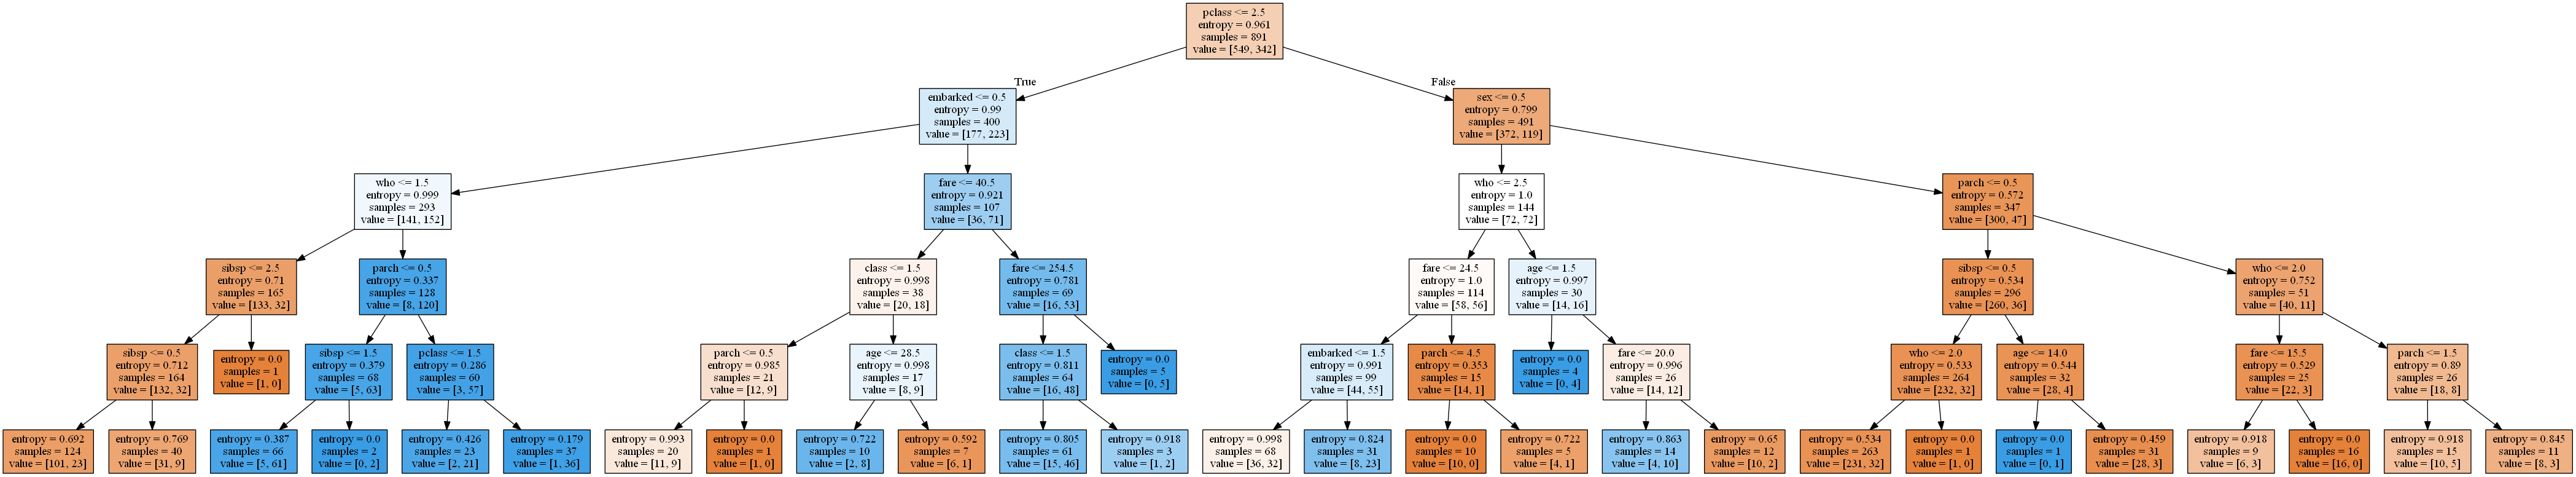

In [906]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

import pydotplus
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())